In [1]:
import pandas as pd 
import numpy as np 
from tqdm import tqdm
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statistics import mean 
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import smogn

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\

# Data preparation 

### Import dataset

In [2]:
train=pd.read_csv("./Train.csv")

In [3]:
# 'loc' already integer encoded {1,2,3,4,5,6} and 'dist_motorway' removed
meta_data = pd.read_csv("./airqo_metadata.csv")

In [4]:
train.head()

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target
0,ID_train_0,C,"nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...",45.126304
1,ID_train_1,D,"22.53333333,21.71666667,20.83333333,20.9833333...","0.102,0.0,0.0,0.0,0.0,0.0,0.0,0.034,0.017,0.01...","0.744583333,0.808083333,0.911166667,0.91633333...","281.6643101,89.15629262,81.96853891,291.018632...","2.3775,1.126666667,0.700833333,0.3416666670000...","90.32,90.3775,90.44083333,90.4725,90.45416667,...",79.131702
2,ID_train_10,A,"28.975,27.95,29.6,26.425,22.09166667,21.775,22...","0.0,0.0,0.0,0.102,0.136,0.0,0.0,2.16,1.276,0.0...","0.573333333,0.597166667,0.5668333329999999,0.6...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","88.55166667,88.46416667,88.31916667,88.24,88.2...",32.661304
3,ID_train_100,A,"22.96666667,24.26666667,25.275,25.625,25.86666...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.77,3.012,1.0...","0.8430833329999999,0.79025,0.7375,0.728,0.7049...","300.0850574,293.6769595,294.5174647,301.921416...","1.446666667,1.1925,1.324166667,1.5441666669999...","88.615,88.53083333,88.4,88.27166667,88.2075,88...",53.850238
4,ID_train_1000,A,"21.875,21.575,21.525,21.43333333,20.50833333,1...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....","0.8564166670000001,0.874916667,0.879833333,0.8...","21.83997432,17.05405341,89.26406044,123.585424...","0.1975,0.244166667,0.411666667,0.56,0.5775,0.4...","88.55666667,88.64083333,88.65833333,88.6475,88...",177.418750


In [5]:
meta_data.head()

,location,loc_altitude,km2,aspect,dist_trunk,dist_primary,dist_secondary,dist_tertiary,dist_unclassified,dist_residential,popn,hh,hh_cook_charcoal,hh_cook_firewood,hh_burn_waste,loc
0,A,1122.4,1.9,194.0,5000.000000,14.695789,343.595039,575.917422,330.609776,254.307415,4763,809,508,43,142,1
1,B,1155.4,5.4,219.8,528.078476,2172.680462,1144.376412,531.103271,65.142004,1.042809,22243,5735,116,1144,239,2
2,C,1178.3,8.5,168.7,32.885520,4794.704552,12.730489,72.459340,406.967815,13.931350,97895,26873,21316,751,9835,3
3,D,980.8,0.8,90.0,5000.000000,265.896472,5000.000000,339.693908,76.024389,11.601442,3596,663,7,651,99,4
4,E,1186.5,1.6,121.0,850.423131,5000.000000,1738.872942,137.722087,449.591885,3.836589,6064,1297,985,26,43,5


### Features engineering part

In [6]:
# covert features from string to List of values
def replace_nan(x):
    if x==" ":
        return np.nan
    else :
        return float(x)
features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
for feature in features : 
    train[feature]=train[feature].apply(lambda x: [replace_nan(X) for X in x.replace("nan"," ").split(",")])

In [7]:
# Convert hours into daily average

for feature in tqdm(features):
    for r in range(train.shape[0]):
        avg = []
        for a in range(0,5):
            first = 24*a
            last = (24*(a+1))+1
            avgv = np.nanmean(train[feature][r][first:last])
            avg.append(avgv)
        train[feature][r] = avg
train.head()

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:14<00:00, 12.46s/it]


,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target
0,ID_train_0,C,"[nan, nan, nan, nan, 22.299526514375]","[nan, nan, nan, nan, 0.0]","[nan, nan, nan, nan, 0.758530303]","[nan, nan, nan, nan, 209.57465462812502]","[nan, nan, nan, nan, 0.677348484875]","[nan, nan, nan, nan, 87.75243371187499]",45.126304
1,ID_train_1,D,"[24.5983333332, 25.682000000000002, 25.0643333...","[0.00884, 0.0, 0.00272, 0.0, 0.02244]","[0.7689733332799998, 0.7005400001200001, 0.747...","[179.55315947440002, 172.66441776759999, 167.2...","[0.78643333332, 1.01683333336, 0.8164666666799...","[90.36050000000002, 90.37163333279999, 90.4401...",79.131702
2,ID_train_10,A,"[22.3073333336, 22.031376263333332, 25.4629999...","[0.41088, 0.33083333333333326, 0.0, 0.0, 0.0]","[0.80059333332, 0.7871328913750001, 0.65393000...","[nan, 318.5086036333334, 195.51153734055998, 1...","[nan, 1.167222222, 0.9616333333999999, 1.15283...","[88.58496666639999, 88.49565972291667, 88.3588...",32.661304
3,ID_train_100,A,"[20.900333334000003, 21.3174545468, 21.3466666...","[0.47547999999999996, 0.13463999999999998, 0.9...","[0.88293333336, 0.9111854545999999, 0.89851060...","[274.33062135, 279.80904280448, 321.2934881777...","[1.4232500001, 1.3421, 1.9958333335555558, 1.9...","[88.4010000008, 88.2620333332, 88.355233333199...",53.850238
4,ID_train_1000,A,"[22.172333333600005, 20.135416665, 20.94015151...","[0.006120000000000001, 0.0, 0.0, nan, nan]","[0.77601, 0.8424583335, 0.8092992425000001, na...","[172.75364167520002, 229.04084504000002, 127.3...","[0.76280000012, 0.5222916665, 0.6297727275, na...","[88.54163333320001, 88.5364583325, 88.48155303...",177.418750


In [8]:
# replace NaN values with predecessing or successive values
for feature in tqdm(features):
    for x in range(train.shape[0]):
        s = pd.Series(train[feature][x])
        s = s.fillna(method = 'ffill')
        s = s.fillna(method = 'bfill')
        train[feature][x] = s.tolist()

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:13<00:00, 12.18s/it]


In [9]:
train.head()

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target
0,ID_train_0,C,"[22.299526514375, 22.299526514375, 22.29952651...","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.758530303, 0.758530303, 0.758530303, 0.7585...","[209.57465462812502, 209.57465462812502, 209.5...","[0.677348484875, 0.677348484875, 0.67734848487...","[87.75243371187499, 87.75243371187499, 87.7524...",45.126304
1,ID_train_1,D,"[24.5983333332, 25.682000000000002, 25.0643333...","[0.00884, 0.0, 0.00272, 0.0, 0.02244]","[0.7689733332799998, 0.7005400001200001, 0.747...","[179.55315947440002, 172.66441776759999, 167.2...","[0.78643333332, 1.01683333336, 0.8164666666799...","[90.36050000000002, 90.37163333279999, 90.4401...",79.131702
2,ID_train_10,A,"[22.3073333336, 22.031376263333332, 25.4629999...","[0.41088, 0.33083333333333326, 0.0, 0.0, 0.0]","[0.80059333332, 0.7871328913750001, 0.65393000...","[318.5086036333334, 318.5086036333334, 195.511...","[1.167222222, 1.167222222, 0.9616333333999999,...","[88.58496666639999, 88.49565972291667, 88.3588...",32.661304
3,ID_train_100,A,"[20.900333334000003, 21.3174545468, 21.3466666...","[0.47547999999999996, 0.13463999999999998, 0.9...","[0.88293333336, 0.9111854545999999, 0.89851060...","[274.33062135, 279.80904280448, 321.2934881777...","[1.4232500001, 1.3421, 1.9958333335555558, 1.9...","[88.4010000008, 88.2620333332, 88.355233333199...",53.850238
4,ID_train_1000,A,"[22.172333333600005, 20.135416665, 20.94015151...","[0.006120000000000001, 0.0, 0.0, 0.0, 0.0]","[0.77601, 0.8424583335, 0.8092992425000001, 0....","[172.75364167520002, 229.04084504000002, 127.3...","[0.76280000012, 0.5222916665, 0.6297727275, 0....","[88.54163333320001, 88.5364583325, 88.48155303...",177.418750


In [10]:
train = train.loc[:,['location','target','temp','precip','rel_humidity','wind_dir','wind_spd','atmos_press']]

train.head()

,location,target,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press
0,C,45.126304,"[22.299526514375, 22.299526514375, 22.29952651...","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.758530303, 0.758530303, 0.758530303, 0.7585...","[209.57465462812502, 209.57465462812502, 209.5...","[0.677348484875, 0.677348484875, 0.67734848487...","[87.75243371187499, 87.75243371187499, 87.7524..."
1,D,79.131702,"[24.5983333332, 25.682000000000002, 25.0643333...","[0.00884, 0.0, 0.00272, 0.0, 0.02244]","[0.7689733332799998, 0.7005400001200001, 0.747...","[179.55315947440002, 172.66441776759999, 167.2...","[0.78643333332, 1.01683333336, 0.8164666666799...","[90.36050000000002, 90.37163333279999, 90.4401..."
2,A,32.661304,"[22.3073333336, 22.031376263333332, 25.4629999...","[0.41088, 0.33083333333333326, 0.0, 0.0, 0.0]","[0.80059333332, 0.7871328913750001, 0.65393000...","[318.5086036333334, 318.5086036333334, 195.511...","[1.167222222, 1.167222222, 0.9616333333999999,...","[88.58496666639999, 88.49565972291667, 88.3588..."
3,A,53.850238,"[20.900333334000003, 21.3174545468, 21.3466666...","[0.47547999999999996, 0.13463999999999998, 0.9...","[0.88293333336, 0.9111854545999999, 0.89851060...","[274.33062135, 279.80904280448, 321.2934881777...","[1.4232500001, 1.3421, 1.9958333335555558, 1.9...","[88.4010000008, 88.2620333332, 88.355233333199..."
4,A,177.418750,"[22.172333333600005, 20.135416665, 20.94015151...","[0.006120000000000001, 0.0, 0.0, 0.0, 0.0]","[0.77601, 0.8424583335, 0.8092992425000001, 0....","[172.75364167520002, 229.04084504000002, 127.3...","[0.76280000012, 0.5222916665, 0.6297727275, 0....","[88.54163333320001, 88.5364583325, 88.48155303..."


### Duplicating meta data

In [11]:
# copying meta_data over into 5 days
metas = ['loc_altitude', 'km2', 'aspect', 'dist_trunk', 'dist_primary', 'dist_secondary', 'dist_tertiary', 'dist_unclassified', 'dist_residential', 'popn', 'hh', 'hh_cook_charcoal', 'hh_cook_firewood', 'hh_burn_waste', 'loc']
for col in metas:
    meta_data[col] = meta_data[col].apply(lambda x: [x]*5)

In [12]:
meta_data.head()

,location,loc_altitude,km2,aspect,dist_trunk,dist_primary,dist_secondary,dist_tertiary,dist_unclassified,dist_residential,popn,hh,hh_cook_charcoal,hh_cook_firewood,hh_burn_waste,loc
0,A,"[1122.4, 1122.4, 1122.4, 1122.4, 1122.4]","[1.9, 1.9, 1.9, 1.9, 1.9]","[194.0, 194.0, 194.0, 194.0, 194.0]","[5000.0, 5000.0, 5000.0, 5000.0, 5000.0]","[14.69578945, 14.69578945, 14.69578945, 14.695...","[343.5950389, 343.5950389, 343.5950389, 343.59...","[575.9174216, 575.9174216, 575.9174216, 575.91...","[330.6097755, 330.6097755, 330.6097755, 330.60...","[254.3074148, 254.3074148, 254.3074148, 254.30...","[4763, 4763, 4763, 4763, 4763]","[809, 809, 809, 809, 809]","[508, 508, 508, 508, 508]","[43, 43, 43, 43, 43]","[142, 142, 142, 142, 142]","[1, 1, 1, 1, 1]"
1,B,"[1155.4, 1155.4, 1155.4, 1155.4, 1155.4]","[5.4, 5.4, 5.4, 5.4, 5.4]","[219.8, 219.8, 219.8, 219.8, 219.8]","[528.0784759, 528.0784759, 528.0784759, 528.07...","[2172.6804620000007, 2172.6804620000007, 2172....","[1144.3764119999996, 1144.3764119999996, 1144....","[531.1032705, 531.1032705, 531.1032705, 531.10...","[65.1420043, 65.1420043, 65.1420043, 65.142004...","[1.042808892, 1.042808892, 1.042808892, 1.0428...","[22243, 22243, 22243, 22243, 22243]","[5735, 5735, 5735, 5735, 5735]","[116, 116, 116, 116, 116]","[1144, 1144, 1144, 1144, 1144]","[239, 239, 239, 239, 239]","[2, 2, 2, 2, 2]"
2,C,"[1178.3, 1178.3, 1178.3, 1178.3, 1178.3]","[8.5, 8.5, 8.5, 8.5, 8.5]","[168.7, 168.7, 168.7, 168.7, 168.7]","[32.88551954, 32.88551954, 32.88551954, 32.885...","[4794.704552, 4794.704552, 4794.704552, 4794.7...","[12.73048852, 12.73048852, 12.73048852, 12.730...","[72.45934032, 72.45934032, 72.45934032, 72.459...","[406.9678152, 406.9678152, 406.9678152, 406.96...","[13.93134954, 13.93134954, 13.93134954, 13.931...","[97895, 97895, 97895, 97895, 97895]","[26873, 26873, 26873, 26873, 26873]","[21316, 21316, 21316, 21316, 21316]","[751, 751, 751, 751, 751]","[9835, 9835, 9835, 9835, 9835]","[3, 3, 3, 3, 3]"
3,D,"[980.8, 980.8, 980.8, 980.8, 980.8]","[0.8, 0.8, 0.8, 0.8, 0.8]","[90.0, 90.0, 90.0, 90.0, 90.0]","[5000.0, 5000.0, 5000.0, 5000.0, 5000.0]","[265.8964721, 265.8964721, 265.8964721, 265.89...","[5000.0, 5000.0, 5000.0, 5000.0, 5000.0]","[339.6939077, 339.6939077, 339.6939077, 339.69...","[76.02438885, 76.02438885, 76.02438885, 76.024...","[11.60144208, 11.60144208, 11.60144208, 11.601...","[3596, 3596, 3596, 3596, 3596]","[663, 663, 663, 663, 663]","[7, 7, 7, 7, 7]","[651, 651, 651, 651, 651]","[99, 99, 99, 99, 99]","[4, 4, 4, 4, 4]"
4,E,"[1186.5, 1186.5, 1186.5, 1186.5, 1186.5]","[1.6, 1.6, 1.6, 1.6, 1.6]","[121.0, 121.0, 121.0, 121.0, 121.0]","[850.4231312999998, 850.4231312999998, 850.423...","[5000.0, 5000.0, 5000.0, 5000.0, 5000.0]","[1738.8729420000002, 1738.8729420000002, 1738....","[137.72208740000002, 137.72208740000002, 137.7...","[449.59188539999985, 449.59188539999985, 449.5...","[3.836588765, 3.836588765, 3.836588765, 3.8365...","[6064, 6064, 6064, 6064, 6064]","[1297, 1297, 1297, 1297, 1297]","[985, 985, 985, 985, 985]","[26, 26, 26, 26, 26]","[43, 43, 43, 43, 43]","[5, 5, 5, 5, 5]"


### Combine weather data and locational features

In [13]:
# combine meta data and time serie data into one dataset
train_dataset = pd.merge(train, meta_data, on = "location", how = 'left')

In [14]:
train_dataset.head()

,location,target,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,loc_altitude,km2,...,dist_secondary,dist_tertiary,dist_unclassified,dist_residential,popn,hh,hh_cook_charcoal,hh_cook_firewood,hh_burn_waste,loc
0,C,45.126304,"[22.299526514375, 22.299526514375, 22.29952651...","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.758530303, 0.758530303, 0.758530303, 0.7585...","[209.57465462812502, 209.57465462812502, 209.5...","[0.677348484875, 0.677348484875, 0.67734848487...","[87.75243371187499, 87.75243371187499, 87.7524...","[1178.3, 1178.3, 1178.3, 1178.3, 1178.3]","[8.5, 8.5, 8.5, 8.5, 8.5]",...,"[12.73048852, 12.73048852, 12.73048852, 12.730...","[72.45934032, 72.45934032, 72.45934032, 72.459...","[406.9678152, 406.9678152, 406.9678152, 406.96...","[13.93134954, 13.93134954, 13.93134954, 13.931...","[97895, 97895, 97895, 97895, 97895]","[26873, 26873, 26873, 26873, 26873]","[21316, 21316, 21316, 21316, 21316]","[751, 751, 751, 751, 751]","[9835, 9835, 9835, 9835, 9835]","[3, 3, 3, 3, 3]"
1,D,79.131702,"[24.5983333332, 25.682000000000002, 25.0643333...","[0.00884, 0.0, 0.00272, 0.0, 0.02244]","[0.7689733332799998, 0.7005400001200001, 0.747...","[179.55315947440002, 172.66441776759999, 167.2...","[0.78643333332, 1.01683333336, 0.8164666666799...","[90.36050000000002, 90.37163333279999, 90.4401...","[980.8, 980.8, 980.8, 980.8, 980.8]","[0.8, 0.8, 0.8, 0.8, 0.8]",...,"[5000.0, 5000.0, 5000.0, 5000.0, 5000.0]","[339.6939077, 339.6939077, 339.6939077, 339.69...","[76.02438885, 76.02438885, 76.02438885, 76.024...","[11.60144208, 11.60144208, 11.60144208, 11.601...","[3596, 3596, 3596, 3596, 3596]","[663, 663, 663, 663, 663]","[7, 7, 7, 7, 7]","[651, 651, 651, 651, 651]","[99, 99, 99, 99, 99]","[4, 4, 4, 4, 4]"
2,A,32.661304,"[22.3073333336, 22.031376263333332, 25.4629999...","[0.41088, 0.33083333333333326, 0.0, 0.0, 0.0]","[0.80059333332, 0.7871328913750001, 0.65393000...","[318.5086036333334, 318.5086036333334, 195.511...","[1.167222222, 1.167222222, 0.9616333333999999,...","[88.58496666639999, 88.49565972291667, 88.3588...","[1122.4, 1122.4, 1122.4, 1122.4, 1122.4]","[1.9, 1.9, 1.9, 1.9, 1.9]",...,"[343.5950389, 343.5950389, 343.5950389, 343.59...","[575.9174216, 575.9174216, 575.9174216, 575.91...","[330.6097755, 330.6097755, 330.6097755, 330.60...","[254.3074148, 254.3074148, 254.3074148, 254.30...","[4763, 4763, 4763, 4763, 4763]","[809, 809, 809, 809, 809]","[508, 508, 508, 508, 508]","[43, 43, 43, 43, 43]","[142, 142, 142, 142, 142]","[1, 1, 1, 1, 1]"
3,A,53.850238,"[20.900333334000003, 21.3174545468, 21.3466666...","[0.47547999999999996, 0.13463999999999998, 0.9...","[0.88293333336, 0.9111854545999999, 0.89851060...","[274.33062135, 279.80904280448, 321.2934881777...","[1.4232500001, 1.3421, 1.9958333335555558, 1.9...","[88.4010000008, 88.2620333332, 88.355233333199...","[1122.4, 1122.4, 1122.4, 1122.4, 1122.4]","[1.9, 1.9, 1.9, 1.9, 1.9]",...,"[343.5950389, 343.5950389, 343.5950389, 343.59...","[575.9174216, 575.9174216, 575.9174216, 575.91...","[330.6097755, 330.6097755, 330.6097755, 330.60...","[254.3074148, 254.3074148, 254.3074148, 254.30...","[4763, 4763, 4763, 4763, 4763]","[809, 809, 809, 809, 809]","[508, 508, 508, 508, 508]","[43, 43, 43, 43, 43]","[142, 142, 142, 142, 142]","[1, 1, 1, 1, 1]"
4,A,177.418750,"[22.172333333600005, 20.135416665, 20.94015151...","[0.006120000000000001, 0.0, 0.0, 0.0, 0.0]","[0.77601, 0.8424583335, 0.8092992425000001, 0....","[172.75364167520002, 229.04084504000002, 127.3...","[0.76280000012, 0.5222916665, 0.6297727275, 0....","[88.54163333320001, 88.5364583325, 88.48155303...","[1122.4, 1122.4, 1122.4, 1122.4, 1122.4]","[1.9, 1.9, 1.9, 1.9, 1.9]",...,"[343.5950389, 343.5950389, 343.5950389, 343.59...","[575.9174216, 575.9174216, 575.9174216, 575.91...","[330.6097755, 330.6097755, 330.6097755, 330.60...","[254.3074148, 254.3074148, 254.3074148, 254.30...","[4763, 4763, 4763, 4763, 4763]","[809, 809, 809, 809, 809]","[508, 508, 508, 508, 508]","[43, 43, 43, 43, 43]","[142, 142, 142, 142, 142]","

In [15]:
train_dataset.drop(['location'],1, inplace=True)

In [16]:
train_dataset.head()

,target,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,loc_altitude,km2,aspect,...,dist_secondary,dist_tertiary,dist_unclassified,dist_residential,popn,hh,hh_cook_charcoal,hh_cook_firewood,hh_burn_waste,loc
0,45.126304,"[22.299526514375, 22.299526514375, 22.29952651...","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.758530303, 0.758530303, 0.758530303, 0.7585...","[209.57465462812502, 209.57465462812502, 209.5...","[0.677348484875, 0.677348484875, 0.67734848487...","[87.75243371187499, 87.75243371187499, 87.7524...","[1178.3, 1178.3, 1178.3, 1178.3, 1178.3]","[8.5, 8.5, 8.5, 8.5, 8.5]","[168.7, 168.7, 168.7, 168.7, 168.7]",...,"[12.73048852, 12.73048852, 12.73048852, 12.730...","[72.45934032, 72.45934032, 72.45934032, 72.459...","[406.9678152, 406.9678152, 406.9678152, 406.96...","[13.93134954, 13.93134954, 13.93134954, 13.931...","[97895, 97895, 97895, 97895, 97895]","[26873, 26873, 26873, 26873, 26873]","[21316, 21316, 21316, 21316, 21316]","[751, 751, 751, 751, 751]","[9835, 9835, 9835, 9835, 9835]","[3, 3, 3, 3, 3]"
1,79.131702,"[24.5983333332, 25.682000000000002, 25.0643333...","[0.00884, 0.0, 0.00272, 0.0, 0.02244]","[0.7689733332799998, 0.7005400001200001, 0.747...","[179.55315947440002, 172.66441776759999, 167.2...","[0.78643333332, 1.01683333336, 0.8164666666799...","[90.36050000000002, 90.37163333279999, 90.4401...","[980.8, 980.8, 980.8, 980.8, 980.8]","[0.8, 0.8, 0.8, 0.8, 0.8]","[90.0, 90.0, 90.0, 90.0, 90.0]",...,"[5000.0, 5000.0, 5000.0, 5000.0, 5000.0]","[339.6939077, 339.6939077, 339.6939077, 339.69...","[76.02438885, 76.02438885, 76.02438885, 76.024...","[11.60144208, 11.60144208, 11.60144208, 11.601...","[3596, 3596, 3596, 3596, 3596]","[663, 663, 663, 663, 663]","[7, 7, 7, 7, 7]","[651, 651, 651, 651, 651]","[99, 99, 99, 99, 99]","[4, 4, 4, 4, 4]"
2,32.661304,"[22.3073333336, 22.031376263333332, 25.4629999...","[0.41088, 0.33083333333333326, 0.0, 0.0, 0.0]","[0.80059333332, 0.7871328913750001, 0.65393000...","[318.5086036333334, 318.5086036333334, 195.511...","[1.167222222, 1.167222222, 0.9616333333999999,...","[88.58496666639999, 88.49565972291667, 88.3588...","[1122.4, 1122.4, 1122.4, 1122.4, 1122.4]","[1.9, 1.9, 1.9, 1.9, 1.9]","[194.0, 194.0, 194.0, 194.0, 194.0]",...,"[343.5950389, 343.5950389, 343.5950389, 343.59...","[575.9174216, 575.9174216, 575.9174216, 575.91...","[330.6097755, 330.6097755, 330.6097755, 330.60...","[254.3074148, 254.3074148, 254.3074148, 254.30...","[4763, 4763, 4763, 4763, 4763]","[809, 809, 809, 809, 809]","[508, 508, 508, 508, 508]","[43, 43, 43, 43, 43]","[142, 142, 142, 142, 142]","[1, 1, 1, 1, 1]"
3,53.850238,"[20.900333334000003, 21.3174545468, 21.3466666...","[0.47547999999999996, 0.13463999999999998, 0.9...","[0.88293333336, 0.9111854545999999, 0.89851060...","[274.33062135, 279.80904280448, 321.2934881777...","[1.4232500001, 1.3421, 1.9958333335555558, 1.9...","[88.4010000008, 88.2620333332, 88.355233333199...","[1122.4, 1122.4, 1122.4, 1122.4, 1122.4]","[1.9, 1.9, 1.9, 1.9, 1.9]","[194.0, 194.0, 194.0, 194.0, 194.0]",...,"[343.5950389, 343.5950389, 343.5950389, 343.59...","[575.9174216, 575.9174216, 575.9174216, 575.91...","[330.6097755, 330.6097755, 330.6097755, 330.60...","[254.3074148, 254.3074148, 254.3074148, 254.30...","[4763, 4763, 4763, 4763, 4763]","[809, 809, 809, 809, 809]","[508, 508, 508, 508, 508]","[43, 43, 43, 43, 43]","[142, 142, 142, 142, 142]","[1, 1, 1, 1, 1]"
4,177.418750,"[22.172333333600005, 20.135416665, 20.94015151...","[0.006120000000000001, 0.0, 0.0, 0.0, 0.0]","[0.77601, 0.8424583335, 0.8092992425000001, 0....","[172.75364167520002, 229.04084504000002, 127.3...","[0.76280000012, 0.5222916665, 0.6297727275, 0....","[88.54163333320001, 88.5364583325, 88.48155303...","[1122.4, 1122.4, 1122.4, 1122.4, 1122.4]","[1.9, 1.9, 1.9, 1.9, 1.9]","[194.0, 194.0, 194.0, 194.0, 194.0]",...,"[343.5950389, 343.5950389, 343.5950389, 343.59...","[575.9174216, 575.9174216, 575.9174216, 575.91...","[330.6097755, 330.6097755, 330.6097755, 330.60...","[254.3074148, 254.3

### Split into input and output

In [17]:
X = train_dataset.copy()
X.drop(['target'],1,inplace = True)
Y = train_dataset.loc[:,['target']]

In [18]:
X.head()

,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,loc_altitude,km2,aspect,dist_trunk,...,dist_secondary,dist_tertiary,dist_unclassified,dist_residential,popn,hh,hh_cook_charcoal,hh_cook_firewood,hh_burn_waste,loc
0,"[22.299526514375, 22.299526514375, 22.29952651...","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.758530303, 0.758530303, 0.758530303, 0.7585...","[209.57465462812502, 209.57465462812502, 209.5...","[0.677348484875, 0.677348484875, 0.67734848487...","[87.75243371187499, 87.75243371187499, 87.7524...","[1178.3, 1178.3, 1178.3, 1178.3, 1178.3]","[8.5, 8.5, 8.5, 8.5, 8.5]","[168.7, 168.7, 168.7, 168.7, 168.7]","[32.88551954, 32.88551954, 32.88551954, 32.885...",...,"[12.73048852, 12.73048852, 12.73048852, 12.730...","[72.45934032, 72.45934032, 72.45934032, 72.459...","[406.9678152, 406.9678152, 406.9678152, 406.96...","[13.93134954, 13.93134954, 13.93134954, 13.931...","[97895, 97895, 97895, 97895, 97895]","[26873, 26873, 26873, 26873, 26873]","[21316, 21316, 21316, 21316, 21316]","[751, 751, 751, 751, 751]","[9835, 9835, 9835, 9835, 9835]","[3, 3, 3, 3, 3]"
1,"[24.5983333332, 25.682000000000002, 25.0643333...","[0.00884, 0.0, 0.00272, 0.0, 0.02244]","[0.7689733332799998, 0.7005400001200001, 0.747...","[179.55315947440002, 172.66441776759999, 167.2...","[0.78643333332, 1.01683333336, 0.8164666666799...","[90.36050000000002, 90.37163333279999, 90.4401...","[980.8, 980.8, 980.8, 980.8, 980.8]","[0.8, 0.8, 0.8, 0.8, 0.8]","[90.0, 90.0, 90.0, 90.0, 90.0]","[5000.0, 5000.0, 5000.0, 5000.0, 5000.0]",...,"[5000.0, 5000.0, 5000.0, 5000.0, 5000.0]","[339.6939077, 339.6939077, 339.6939077, 339.69...","[76.02438885, 76.02438885, 76.02438885, 76.024...","[11.60144208, 11.60144208, 11.60144208, 11.601...","[3596, 3596, 3596, 3596, 3596]","[663, 663, 663, 663, 663]","[7, 7, 7, 7, 7]","[651, 651, 651, 651, 651]","[99, 99, 99, 99, 99]","[4, 4, 4, 4, 4]"
2,"[22.3073333336, 22.031376263333332, 25.4629999...","[0.41088, 0.33083333333333326, 0.0, 0.0, 0.0]","[0.80059333332, 0.7871328913750001, 0.65393000...","[318.5086036333334, 318.5086036333334, 195.511...","[1.167222222, 1.167222222, 0.9616333333999999,...","[88.58496666639999, 88.49565972291667, 88.3588...","[1122.4, 1122.4, 1122.4, 1122.4, 1122.4]","[1.9, 1.9, 1.9, 1.9, 1.9]","[194.0, 194.0, 194.0, 194.0, 194.0]","[5000.0, 5000.0, 5000.0, 5000.0, 5000.0]",...,"[343.5950389, 343.5950389, 343.5950389, 343.59...","[575.9174216, 575.9174216, 575.9174216, 575.91...","[330.6097755, 330.6097755, 330.6097755, 330.60...","[254.3074148, 254.3074148, 254.3074148, 254.30...","[4763, 4763, 4763, 4763, 4763]","[809, 809, 809, 809, 809]","[508, 508, 508, 508, 508]","[43, 43, 43, 43, 43]","[142, 142, 142, 142, 142]","[1, 1, 1, 1, 1]"
3,"[20.900333334000003, 21.3174545468, 21.3466666...","[0.47547999999999996, 0.13463999999999998, 0.9...","[0.88293333336, 0.9111854545999999, 0.89851060...","[274.33062135, 279.80904280448, 321.2934881777...","[1.4232500001, 1.3421, 1.9958333335555558, 1.9...","[88.4010000008, 88.2620333332, 88.355233333199...","[1122.4, 1122.4, 1122.4, 1122.4, 1122.4]","[1.9, 1.9, 1.9, 1.9, 1.9]","[194.0, 194.0, 194.0, 194.0, 194.0]","[5000.0, 5000.0, 5000.0, 5000.0, 5000.0]",...,"[343.5950389, 343.5950389, 343.5950389, 343.59...","[575.9174216, 575.9174216, 575.9174216, 575.91...","[330.6097755, 330.6097755, 330.6097755, 330.60...","[254.3074148, 254.3074148, 254.3074148, 254.30...","[4763, 4763, 4763, 4763, 4763]","[809, 809, 809, 809, 809]","[508, 508, 508, 508, 508]","[43, 43, 43, 43, 43]","[142, 142, 142, 142, 142]","[1, 1, 1, 1, 1]"
4,"[22.172333333600005, 20.135416665, 20.94015151...","[0.006120000000000001, 0.0, 0.0, 0.0, 0.0]","[0.77601, 0.8424583335, 0.8092992425000001, 0....","[172.75364167520002, 229.04084504000002, 127.3...","[0.76280000012, 0.5222916665, 0.6297727275, 0....","[88.54163333320001, 88.5364583325, 88.48155303...","[1122.4, 1122.4, 1122.4, 1122.4, 1122.4]","[1.9, 1.9, 1.9, 1.9, 1.9]","[194.0, 194.0, 194.0, 194.0, 194.0]","[5000.0, 5000.0, 5000.0, 5000.0, 5000.0]",...

In [19]:
Y.tail()

,target
15534,44.850286
15535,24.330455
15536,38.972128
15537,41.720952
15538,127.983333


### Convert to numpy

In [23]:
# OUTPUT
np_Y = Y.to_numpy()

In [24]:
np_Y.shape

(15539, 1)

In [27]:
# INPUT
# convert lists to strings
features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press","loc_altitude", "km2", "aspect", "dist_trunk", "dist_primary", "dist_secondary", "dist_tertiary", "dist_unclassified", "dist_residential", "popn", "hh", "hh_cook_charcoal", "hh_cook_firewood", "hh_burn_waste", "loc"]

for feature in tqdm(features):
    for i in range(X.shape[0]):
        X[feature][i] = ','.join([str(elem) for elem in X[feature][i]])
X

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:54<00:00,  2.61s/it]


,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,loc_altitude,km2,aspect,dist_trunk,...,dist_secondary,dist_tertiary,dist_unclassified,dist_residential,popn,hh,hh_cook_charcoal,hh_cook_firewood,hh_burn_waste,loc
0,"22.299526514375,22.299526514375,22.29952651437...","0.0,0.0,0.0,0.0,0.0","0.758530303,0.758530303,0.758530303,0.75853030...","209.57465462812502,209.57465462812502,209.5746...","0.677348484875,0.677348484875,0.677348484875,0...","87.75243371187499,87.75243371187499,87.7524337...","1178.3,1178.3,1178.3,1178.3,1178.3","8.5,8.5,8.5,8.5,8.5","168.7,168.7,168.7,168.7,168.7","32.88551954,32.88551954,32.88551954,32.8855195...",...,"12.73048852,12.73048852,12.73048852,12.7304885...","72.45934032,72.45934032,72.45934032,72.4593403...","406.9678152,406.9678152,406.9678152,406.967815...","13.93134954,13.93134954,13.93134954,13.9313495...","97895,97895,97895,97895,97895","26873,26873,26873,26873,26873","21316,21316,21316,21316,21316","751,751,751,751,751","9835,9835,9835,9835,9835","3,3,3,3,3"
1,"24.5983333332,25.682000000000002,25.0643333324...","0.00884,0.0,0.00272,0.0,0.02244","0.7689733332799998,0.7005400001200001,0.747066...","179.55315947440002,172.66441776759999,167.2581...","0.78643333332,1.01683333336,0.8164666666799999...","90.36050000000002,90.37163333279999,90.4401,90...","980.8,980.8,980.8,980.8,980.8","0.8,0.8,0.8,0.8,0.8","90.0,90.0,90.0,90.0,90.0","5000.0,5000.0,5000.0,5000.0,5000.0",...,"5000.0,5000.0,5000.0,5000.0,5000.0","339.6939077,339.6939077,339.6939077,339.693907...","76.02438885,76.02438885,76.02438885,76.0243888...","11.60144208,11.60144208,11.60144208,11.6014420...","3596,3596,3596,3596,3596","663,663,663,663,663","7,7,7,7,7","651,651,651,651,651","99,99,99,99,99","4,4,4,4,4"
2,"22.3073333336,22.031376263333332,25.4629999992...","0.41088,0.33083333333333326,0.0,0.0,0.0","0.80059333332,0.7871328913750001,0.65393000003...","318.5086036333334,318.5086036333334,195.511537...","1.167222222,1.167222222,0.9616333333999999,1.1...","88.58496666639999,88.49565972291667,88.3588333...","1122.4,1122.4,1122.4,1122.4,1122.4","1.9,1.9,1.9,1.9,1.9","194.0,194.0,194.0,194.0,194.0","5000.0,5000.0,5000.0,5000.0,5000.0",...,"343.5950389,343.5950389,343.5950389,343.595038...","575.9174216,575.9174216,575.9174216,575.917421...","330.6097755,330.6097755,330.6097755,330.609775...","254.3074148,254.3074148,254.3074148,254.307414...","4763,4763,4763,4763,4763","809,809,809,809,809","508,508,508,508,508","43,43,43,43,43","142,142,142,142,142","1,1,1,1,1"
3,"20.900333334000003,21.3174545468,21.3466666668...","0.47547999999999996,0.13463999999999998,0.9623...","0.88293333336,0.9111854545999999,0.89851060604...","274.33062135,279.80904280448,321.2934881777777...","1.4232500001,1.3421,1.9958333335555558,1.91183...","88.4010000008,88.2620333332,88.35523333319999,...","1122.4,1122.4,1122.4,1122.4,1122.4","1.9,1.9,1.9,1.9,1.9","194.0,194.0,194.0,194.0,194.0","5000.0,5000.0,5000.0,5000.0,5000.0",...,"343.5950389,343.5950389,343.5950389,343.595038...","575.9174216,575.9174216,575.9174216,575.917421...","330.6097755,330.6097755,330.6097755,330.609775...","254.3074148,254.3074148,254.3074148,254.307414...","4763,4763,4763,4763,4763","809,809,809,809,809","508,508,508,508,508","43,43,43,43,43","142,142,142,142,142","1,1,1,1,1"
4,"22.172333333600005,20.135416665,20.940151515,2...","0.006120000000000001,0.0,0.0,0.0,0.0","0.77601,0.8424583335,0.8092992425000001,0.8092...","172.75364167520002,229.04084504000002,127.3059...","0.76280000012,0.5222916665,0.6297727275,0.6297...","88.54163333320001,88.5364583325,88.48155303,88...","1122.4,1122.4,1122.4,1122.4,1122.4","1.9,1.9,1.9,1.9,1.9","194.0,194.0,194.0,194.0,194.0","5000.0,5000.0,5000.0,5000.0,5000.0",...,"343.5950389,343.5950389,343.5950389,343.595038...","575.9174216,575.9174216,575.9174216,575.917421...","330.6097755,330.6097755,330.6097755,330.609775...","254.3074148,254.3074148,254.3074148,254.307414...","4763,4763,4763,4763,4763","809,809,809,809,809","508,508,508,508,508","43,43,4

In [28]:
# convert pandas dataframe to numpy array
npX = X.to_numpy()
npX

array([['22.299526514375,22.299526514375,22.299526514375,22.299526514375,22.299526514375',
        '0.0,0.0,0.0,0.0,0.0',
        '0.758530303,0.758530303,0.758530303,0.758530303,0.758530303',
        ..., '751,751,751,751,751', '9835,9835,9835,9835,9835',
        '3,3,3,3,3'],
       ['24.5983333332,25.682000000000002,25.0643333324,24.2713333332,24.091000000000005',
        '0.00884,0.0,0.00272,0.0,0.02244',
        '0.7689733332799998,0.7005400001200001,0.7470666666400001,0.7738499999599999,0.7848899999600001',
        ..., '651,651,651,651,651', '99,99,99,99,99', '4,4,4,4,4'],
       ['22.3073333336,22.031376263333332,25.4629999992,25.263333333200002,26.0826666668',
        '0.41088,0.33083333333333326,0.0,0.0,0.0',
        '0.80059333332,0.7871328913750001,0.6539300000399999,0.6558799999599999,0.63602666664',
        ..., '43,43,43,43,43', '142,142,142,142,142', '1,1,1,1,1'],
       ...,
       ['24.3100000004,23.2476666676,25.417666667600002,26.6333333332,24.47222222166666',
     

In [29]:
# convert strings into nested numpy array
for j in tqdm(range(npX.shape[1])):
    for i in range(npX.shape[0]):
        npX[i,j] = np.fromstring(npX[i,j], sep = ',')
npX

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 12.04it/s]


array([[array([22.29952651, 22.29952651, 22.29952651, 22.29952651, 22.29952651]),
        array([0., 0., 0., 0., 0.]),
        array([0.7585303, 0.7585303, 0.7585303, 0.7585303, 0.7585303]),
        ..., array([751., 751., 751., 751., 751.]),
        array([9835., 9835., 9835., 9835., 9835.]),
        array([3., 3., 3., 3., 3.])],
       [array([24.59833333, 25.682     , 25.06433333, 24.27133333, 24.091     ]),
        array([0.00884, 0.     , 0.00272, 0.     , 0.02244]),
        array([0.76897333, 0.70054   , 0.74706667, 0.77385   , 0.78489   ]),
        ..., array([651., 651., 651., 651., 651.]),
        array([99., 99., 99., 99., 99.]), array([4., 4., 4., 4., 4.])],
       [array([22.30733333, 22.03137626, 25.463     , 25.26333333, 26.08266667]),
        array([0.41088   , 0.33083333, 0.        , 0.        , 0.        ]),
        array([0.80059333, 0.78713289, 0.65393   , 0.65588   , 0.63602667]),
        ..., array([43., 43., 43., 43., 43.]),
        array([142., 142., 142., 142., 

In [30]:
# create 3D shape
npX3D = np.array([e.tolist() for e in npX.flatten()]).reshape(npX.shape[0],npX.shape[1],-1)
npX3D

array([[[2.22995265e+01, 2.22995265e+01, 2.22995265e+01, 2.22995265e+01,
         2.22995265e+01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [7.58530303e-01, 7.58530303e-01, 7.58530303e-01, 7.58530303e-01,
         7.58530303e-01],
        ...,
        [7.51000000e+02, 7.51000000e+02, 7.51000000e+02, 7.51000000e+02,
         7.51000000e+02],
        [9.83500000e+03, 9.83500000e+03, 9.83500000e+03, 9.83500000e+03,
         9.83500000e+03],
        [3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
         3.00000000e+00]],

       [[2.45983333e+01, 2.56820000e+01, 2.50643333e+01, 2.42713333e+01,
         2.40910000e+01],
        [8.84000000e-03, 0.00000000e+00, 2.72000000e-03, 0.00000000e+00,
         2.24400000e-02],
        [7.68973333e-01, 7.00540000e-01, 7.47066667e-01, 7.73850000e-01,
         7.84890000e-01],
        ...,
        [6.51000000e+02, 6.51000000e+02, 6.51000000e+02, 6.51000000e+02,
        

In [31]:
print(npX3D.shape)

(15539, 21, 5)


In [32]:
#reshape 3D shape 
re_npX3D = npX3D.swapaxes(1,2)
re_npX3D

array([[[2.22995265e+01, 0.00000000e+00, 7.58530303e-01, ...,
         7.51000000e+02, 9.83500000e+03, 3.00000000e+00],
        [2.22995265e+01, 0.00000000e+00, 7.58530303e-01, ...,
         7.51000000e+02, 9.83500000e+03, 3.00000000e+00],
        [2.22995265e+01, 0.00000000e+00, 7.58530303e-01, ...,
         7.51000000e+02, 9.83500000e+03, 3.00000000e+00],
        [2.22995265e+01, 0.00000000e+00, 7.58530303e-01, ...,
         7.51000000e+02, 9.83500000e+03, 3.00000000e+00],
        [2.22995265e+01, 0.00000000e+00, 7.58530303e-01, ...,
         7.51000000e+02, 9.83500000e+03, 3.00000000e+00]],

       [[2.45983333e+01, 8.84000000e-03, 7.68973333e-01, ...,
         6.51000000e+02, 9.90000000e+01, 4.00000000e+00],
        [2.56820000e+01, 0.00000000e+00, 7.00540000e-01, ...,
         6.51000000e+02, 9.90000000e+01, 4.00000000e+00],
        [2.50643333e+01, 2.72000000e-03, 7.47066667e-01, ...,
         6.51000000e+02, 9.90000000e+01, 4.00000000e+00],
        [2.42713333e+01, 0.00000000e+0

In [33]:
re_npX3D.shape

(15539, 5, 21)

### Plotting variable distributions

##### Input

In [34]:
temp = np.array([])
precip = np.array([])
re_humidity = np.array([])
wind_dir = np.array([])
wind_spd = np.array([])
atmos_press = np.array([])
for j in range(0,6):
    for i in range (re_npX3D.shape[0]):
        lys = list(re_npX3D[:,:,j][i])
        if j == 0:
            temp = np.append(temp, lys)
        if j == 1:
            precip = np.append(precip, lys)
        if j == 2:
            re_humidity = np.append(re_humidity, lys)
        if j == 3:
            wind_dir = np.append(wind_dir, lys)
        if j == 4:
            wind_spd = np.append(wind_spd, lys)
        if j == 5:
            atmos_press = np.append(atmos_press, lys)

In [35]:
# testing if there are still any Nan values in the list
array_sum = np.sum(temp)
arra_has_nan = np.isnan(array_sum)
print(arra_has_nan)

False


<function matplotlib.pyplot.show(*args, **kw)>

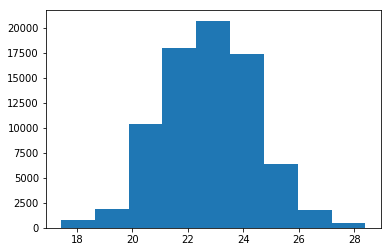

In [36]:
plt.hist(temp, bins = 9)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

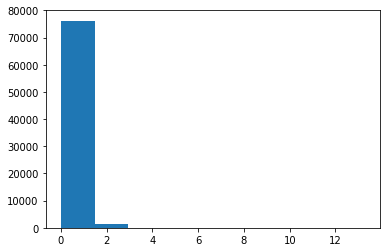

In [37]:
plt.hist(precip, bins = 9)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

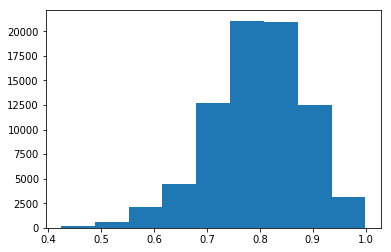

In [38]:
plt.hist(re_humidity, bins = 9)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

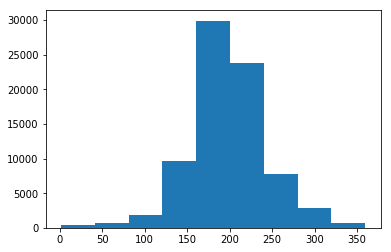

In [39]:
plt.hist(wind_dir, bins = 9)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

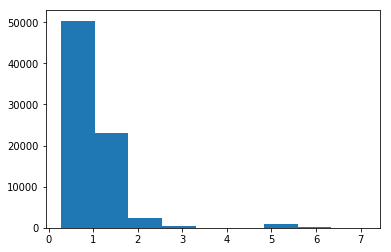

In [40]:
plt.hist(wind_spd, bins = 9)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

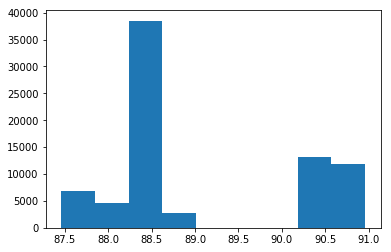

In [41]:
plt.hist(atmos_press, bins = 9)
plt.show

### Split into train and test data sets

##### Regression

In [44]:
x_train, x_test, y_train, y_test = train_test_split(re_npX3D,np_Y,test_size=0.2, random_state=1)

In [142]:
y_train[0:2,]

array([[42.09787234],
       [80.65170213]])

<function matplotlib.pyplot.show(*args, **kw)>

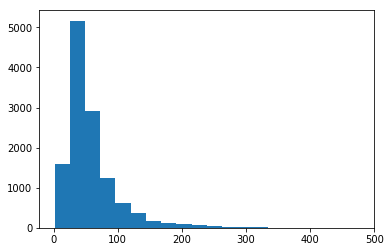

In [327]:
plt.hist(list(y_train[:,0]), bins = 20)
plt.show

In [137]:
y_test[0:2,:]

array([[81.6723913 ],
       [73.04893617]])

<function matplotlib.pyplot.show(*args, **kw)>

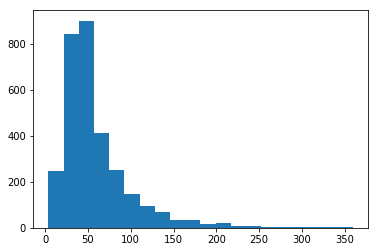

In [143]:
# check to see if the smapling is somewhat alike
plt.hist(list(y_test[:,0]), bins = 20)
plt.show

In [45]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12431, 5, 21)
(12431, 1)
(3108, 5, 21)
(3108, 1)


##### Classification

In [220]:
# convert training set to classes
y_train_class = np.empty((y_train.shape[0],1), dtype = 'O')

maxi = max(y_train[:,0])
print(maxi)

for c in range(y_train.shape[0]):
    if 0 <= y_train[c,0] <= 12:
        y_train_class[c,0] = "good"
    if 12 < y_train[c,0] <= 35:
        y_train_class[c,0] = "moderate"
    if 35 < y_train[c,0] <= 55:
        y_train_class[c,0] = "unhealthy for sensitive groups"
    if 55 < y_train[c,0] <= 150:
        y_train_class[c,0] = "unhealthy"
    if 150 < y_train[c,0] <= 250:
        y_train_class[c,0] = "very unhealthy"
    if 250 < y_train[c,0] <= maxi:
        y_train_class[c,0] = "hazardous"

475.82


In [221]:
y_train_class[0:2,]

array([['unhealthy for sensitive groups'],
       ['unhealthy']], dtype=object)

In [222]:
# convert test set to classes

y_test_class = np.empty((y_test.shape[0],y_test.shape[1]), dtype = 'O')

maxi = max(y_test[:,0])

for c in range(y_test_class.shape[0]):
    if 0 <= y_test[c,0] <= 12:
        y_test_class[c,0] = "good"
    if 12 < y_test[c,0] <= 35:
        y_test_class[c,0] = "moderate"
    if 35 < y_test[c,0] <= 55:
        y_test_class[c,0] = "unhealthy for sensitive groups"
    if 55 < y_test[c,0] <= 150:
        y_test_class[c,0] = "unhealthy"
    if 150 < y_test[c,0] <= 250:
        y_test_class[c,0] = "very unhealthy"
    if 250 < y_test[c,0] <= maxi:
        y_test_class[c,0] = "hazardous"

In [223]:
y_test_class[0:2,]

array([['unhealthy'],
       ['unhealthy']], dtype=object)

### Target value imbalance

##### Regression

In [50]:
# prepare data for smote technique
y_train_sm = y_train.copy()
x_train_sm = np.reshape(x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_train_sm.shape

(12431, 105)

In [51]:
# combine training dataset
com_train_sm = np.concatenate((x_train_sm, y_train_sm), axis = 1)
com_train_sm.shape

(12431, 106)

In [52]:
# checking nan/missing values
array_sum = np.sum(com_train_sm)
array_has_nan = np.isnan(array_sum)
array_has_nan

False

In [53]:
pd_train_sm = pd.DataFrame(com_train_sm)
pd_train_sm = pd_train_sm.rename(columns={105:'target'})
pd_train_sm.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,target
0,23.141333,0.00000,0.782383,180.658964,0.991300,90.556433,980.8,0.8,90.0,5000.0,...,339.693908,76.024389,11.601442,3596.0,663.0,7.0,651.0,99.0,4.0,42.097872
1,23.093000,1.31196,0.842410,177.216407,0.829108,90.707100,980.8,0.8,90.0,5000.0,...,339.693908,76.024389,11.601442,3596.0,663.0,7.0,651.0,99.0,4.0,80.651702
2,23.039182,0.07076,0.834061,178.520783,1.090239,90.502185,980.8,0.8,90.0,5000.0,...,339.693908,76.024389,11.601442,3596.0,663.0,7.0,651.0,99.0,4.0,127.972766
3,21.619333,0.00136,0.835660,225.310836,1.200133,88.359933,1122.4,1.9,194.0,5000.0,...,575.917422,330.609776,254.307415,4763.0,809.0,508.0,43.0,142.0,1.0,56.209767
4,22.678667,0.00136,0.759857,112.767697,0.981733,90.668400,980.8,0.8,90.0,5000.0,...,339.693908,76.024389,11.601442,3596.0,663.0,7.0,651.0,99.0,4.0,39.465319


<function matplotlib.pyplot.show(*args, **kw)>

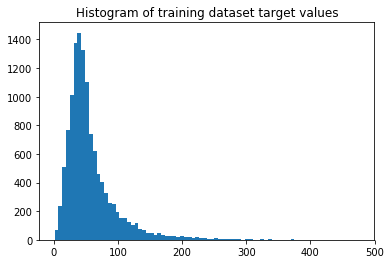

In [110]:
# plot imbalanced output

plt.hist(pd_train_sm['target'], bins = 80)
plt.title('Histogram of training dataset target values')
plt.show

In [376]:
rg_mtrx = [
    [400,  1, 0],  ## over-sample ("minority")
    [50, 0, 0],  ## under-sample ("majority")
]

In [377]:
# tuning SMOGN for regression
final_train_sm3 = smogn.smoter(data = pd_train_sm, y = 'target', samp_method = 'extreme', rel_thres = 0.7, rel_ctrl_pts_rg = rg_mtrx)

r_index: 100%|######################################################################| 670/670 [00:03<00:00, 220.30it/s]


<function matplotlib.pyplot.show(*args, **kw)>

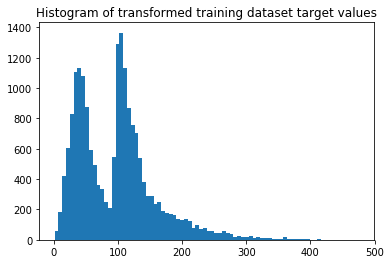

In [378]:
# plot balanced classes
plt.hist(final_train_sm3['target'], bins = 80)
plt.title('Histogram of transformed training dataset target values')
plt.show

In [382]:
# split input and output again
x_train_sm3 = final_train_sm3.iloc[:,0:105]
y_train_sm3 = final_train_sm3.iloc[:,105:106]
x_train_sm3 = x_train_sm3.to_numpy()
y_train_sm3 = y_train_sm3.to_numpy()
x_train_sm3 = np.reshape(x_train_sm3, (x_train_sm3.shape[0], x_train.shape[1], x_train.shape[2]))
print(x_train_sm3.shape)
print(y_train_sm3.shape)

(19325, 5, 21)
(19325, 1)


In [54]:
# apply SMOTE for regression
final_train_sm = smogn.smoter(data = pd_train_sm, y = 'target')

r_index: 100%|####################################################################| 2001/2001 [00:08<00:00, 236.46it/s]


<function matplotlib.pyplot.show(*args, **kw)>

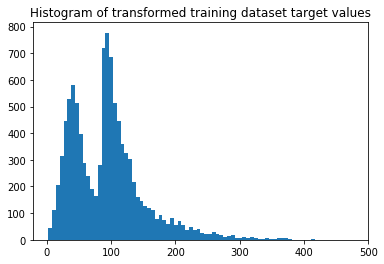

In [328]:
# plot balanced classes
plt.hist(final_train_sm['target'], bins = 80)
plt.title('Histogram of transformed training dataset target values')
plt.show

In [371]:
final_train_sm.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,target
0,21.923731,1.425761,0.811239,164.313633,1.214795,88.408956,1186.5,1.6,121.0,850.423131,...,137.722087,449.591885,3.836589,6064.0,1297.0,985.0,26.0,43.0,5.0,83.300396
1,24.650515,0.000000,0.666988,144.867250,1.252161,90.385674,980.8,0.8,90.0,5000.000000,...,339.693908,76.024389,11.601442,3596.0,663.0,7.0,651.0,99.0,4.0,86.991952
2,23.628857,0.085991,0.732593,192.737504,1.872326,88.390391,1186.5,1.6,121.0,850.423131,...,137.722087,449.591885,3.836589,6064.0,1297.0,985.0,26.0,43.0,5.0,83.315182
3,22.150148,0.000000,0.841801,156.923376,0.869431,90.698794,980.8,0.8,90.0,5000.000000,...,339.693908,76.024389,11.601442,3596.0,663.0,7.0,651.0,99.0,4.0,87.226934
4,21.463425,0.003798,0.868426,217.286898,0.681980,87.653102,1178.3,8.5,168.7,32.885520,...,72.459340,406.967815,13.931350,97895.0,26873.0,21316.0,751.0,9835.0,3.0,87.987548


In [355]:
# split input and output again
x_train_sm2 = final_train_sm.iloc[:,0:105]
y_train_sm2 = final_train_sm.iloc[:,105:106]

In [356]:
x_train_sm2 = x_train_sm2.to_numpy()
y_train_sm2 = y_train_sm2.to_numpy()

In [357]:
x_train_sm2 = np.reshape(x_train_sm2, (x_train_sm2.shape[0], x_train.shape[1], x_train.shape[2]))
x_train_sm2.shape

(10323, 5, 21)

In [358]:
y_train_sm2.shape

(10323, 1)

###### Classification

In [317]:
# transform smote regression dataset into classes

y_train_sm_c = np.empty((y_train_sm2.shape[0],1), dtype = 'O')

maxi = max(y_train_sm2[:,0])
print(maxi)

for c in range(y_train_sm2.shape[0]):
    if 0 <= y_train_sm2[c,0] <= 12:
        y_train_sm_c[c,0] = "good"
    if 12 < y_train_sm2[c,0] <= 35:
        y_train_sm_c[c,0] = "moderate"
    if 35 < y_train_sm2[c,0] <= 55:
        y_train_sm_c[c,0] = "unhealthy for sensitive groups"
    if 55 < y_train_sm2[c,0] <= 150:
        y_train_sm_c[c,0] = "unhealthy"
    if 150 < y_train_sm2[c,0] <= 250:
        y_train_sm_c[c,0] = "very unhealthy"
    if 250 < y_train_sm2[c,0] <= maxi:
        y_train_sm_c[c,0] = "hazardous"

475.82


In [159]:
# prep dataset for smote classification
re_x_train_class = np.reshape(x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
re_x_train_class.shape

(12431, 105)

<function matplotlib.pyplot.show(*args, **kw)>

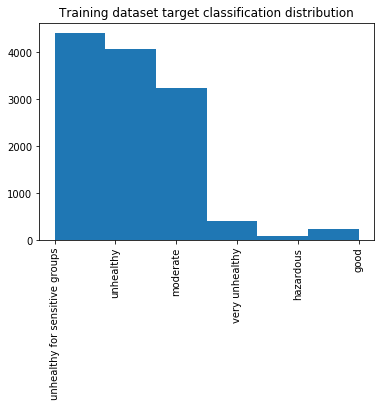

In [224]:
# plot imbalanced classes
classification_train = list(y_train_class[:,0])
plt.hist(classification_train, bins = 6)
plt.title('Training dataset target classification distribution')
plt.xticks(rotation = 90)
plt.show

In [226]:
x_sm = re_x_train_class.copy()
y_sm = y_train_class.copy()

In [227]:
# apply SMOTE for the 3 minority classes
#1
smote = SMOTE('minority')
x_sm, y_sm = smote.fit_sample(x_sm, y_sm)
print(x_sm.shape, y_sm.shape)

(16754, 105) (16754,)


C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [228]:
#2
smote = SMOTE('minority')
x_sm, y_sm = smote.fit_sample(x_sm, y_sm)
print(x_sm.shape, y_sm.shape)

(20931, 105) (20931,)


C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [229]:
#3
smote = SMOTE('minority')
x_sm, y_sm = smote.fit_sample(x_sm, y_sm)
print(x_sm.shape, y_sm.shape)

(24939, 105) (24939,)


C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [230]:
y_train_class_sm = np.reshape(y_sm, (y_sm.shape[0],1))
y_train_class_sm.shape

(24939, 1)

<function matplotlib.pyplot.show(*args, **kw)>

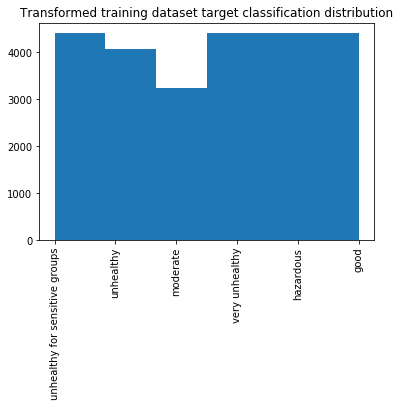

In [231]:
# plot balanced classes
sm_classification = list(y_train_class_sm[:,0])
plt.hist(sm_classification, bins = 6)
plt.title('Transformed training dataset target classification distribution')
plt.xticks(rotation = 90)
plt.show

In [232]:
x_train_class_sm = np.reshape(x_sm, (x_sm.shape[0], x_train_class.shape[1], x_train_class.shape[2]))
x_train_class_sm.shape

(24939, 5, 21)

### Min-max input data scaling

#### Input scaling

In [359]:
sc_x_train = x_train.astype(float)
sc_x_test = x_test.astype(float)
sc_x_train_sm = x_train_sm2.astype(float)
sc_x_train_class_sm = x_train_class_sm.astype(float)

In [360]:
# normalize each training input feature between 0 and 1
for s in range(0,sc_x_train.shape[2]):
    n = sc_x_train[:,:,s].flatten()
    n = n.reshape(len(n),1)
    scaler_in = MinMaxScaler()
    n = scaler_in.fit_transform(n)
    n = n.reshape(sc_x_train.shape[0],sc_x_train.shape[1])
    sc_x_train[:,:,s] = n
sc_x_train

array([[[5.20913702e-01, 0.00000000e+00, 6.22650274e-01, ...,
         5.59033989e-01, 5.71895425e-03, 7.50000000e-01],
        [5.52109596e-01, 1.53429603e-04, 6.16292838e-01, ...,
         5.59033989e-01, 5.71895425e-03, 7.50000000e-01],
        [6.88557456e-01, 0.00000000e+00, 5.19946995e-01, ...,
         5.59033989e-01, 5.71895425e-03, 7.50000000e-01],
        [5.99678017e-01, 5.11432010e-05, 5.85449430e-01, ...,
         5.59033989e-01, 5.71895425e-03, 7.50000000e-01],
        [4.24258072e-01, 2.82882070e-02, 7.47847759e-01, ...,
         5.59033989e-01, 5.71895425e-03, 7.50000000e-01]],

       [[5.16509219e-01, 9.86732852e-02, 7.26916857e-01, ...,
         5.59033989e-01, 5.71895425e-03, 7.50000000e-01],
        [3.74107712e-01, 1.53429603e-04, 7.00190149e-01, ...,
         5.59033989e-01, 5.71895425e-03, 7.50000000e-01],
        [5.55876189e-01, 5.11432010e-05, 4.75636013e-01, ...,
         5.59033989e-01, 5.71895425e-03, 7.50000000e-01],
        [5.54995292e-01, 0.00000000e+0

In [361]:
# normalize each input testing feature between 0 and 1 (with training paramters)
for s in range(0,sc_x_test.shape[2]):
    n = sc_x_test[:,:,s].flatten()
    n = n.reshape(len(n),1)
    n = scaler_in.fit_transform(n)
    n = n.reshape(sc_x_test.shape[0],sc_x_test.shape[1])
    sc_x_test[:,:,s] = n

In [362]:
# normalize each input classification input feature between 0 and 1
for s in range(0,sc_x_train_class_sm.shape[2]):
    n = sc_x_train_class_sm[:,:,s].flatten()
    n = n.reshape(len(n),1)
    scaler_in = MinMaxScaler()
    n = scaler_in.fit_transform(n)
    n = n.reshape(sc_x_train_class_sm.shape[0],sc_x_train_class_sm.shape[1])
    sc_x_train_class_sm[:,:,s] = n

In [363]:
# normalize each input smoted training input feature between 0 and 1
for s in range(0,sc_x_train_sm.shape[2]):
    n = sc_x_train_sm[:,:,s].flatten()
    n = n.reshape(len(n),1)
    scaler_in = MinMaxScaler()
    n = scaler_in.fit_transform(n)
    n = n.reshape(sc_x_train_sm.shape[0],sc_x_train_sm.shape[1])
    sc_x_train_sm[:,:,s] = n

In [383]:
# nuutste
# normalize each input smoted training input feature between 0 and 1
sc_x_train_sm3 = x_train_sm3.astype(float)
for s in range(0,sc_x_train_sm3.shape[2]):
    n = sc_x_train_sm3[:,:,s].flatten()
    n = n.reshape(len(n),1)
    scaler_in = MinMaxScaler()
    n = scaler_in.fit_transform(n)
    n = n.reshape(sc_x_train_sm3.shape[0],sc_x_train_sm3.shape[1])
    sc_x_train_sm3[:,:,s] = n

#### Output scaling

In [336]:
# normalize train output variables

scaler_out = MinMaxScaler()
sc_y_train = scaler_out.fit_transform(y_train)
sc_y_train

array([[0.08568307],
       [0.16695727],
       [0.26671342],
       ...,
       [0.26931872],
       [0.45120319],
       [0.50563305]])

In [337]:
# normalize test output variables

sc_y_test = scaler_out.fit_transform(y_test)
sc_y_test

array([[0.21947815],
       [0.19523716],
       [0.20767695],
       ...,
       [0.1662945 ],
       [0.39118168],
       [0.38364397]])

In [338]:
y_train_class_sm

array(['unhealthy for sensitive groups', 'unhealthy', 'unhealthy', ...,
       'very unhealthy', 'very unhealthy', 'very unhealthy'], dtype=object)

In [339]:
# format train smoted classification output
y_train_class_sm = np.reshape(y_train_class_sm, (y_train_class_sm.shape[0],))

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train_class_sm)
sc_y_train_class_sm = encoder.transform(y_train_class_sm)
# convert integers to dummy variables (i.e. one hot encoded)
sc_y_train_class_sm = np_utils.to_categorical(sc_y_train_class_sm)
sc_y_train_class_sm

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [340]:
y_train_sm_c

array(['unhealthy', 'unhealthy', 'unhealthy', ..., 'unhealthy',
       'very unhealthy', 'very unhealthy'], dtype=object)

In [341]:
# format train regression smoted classification output
y_train_sm_c = np.reshape(y_train_sm_c, (y_train_sm_c.shape[0],))

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train_sm_c)
sc_y_train_sm_c = encoder.transform(y_train_sm_c)
# convert integers to dummy variables (i.e. one hot encoded)
sc_y_train_sm_c = np_utils.to_categorical(sc_y_train_sm_c)
sc_y_train_sm_c

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [342]:
y_test_class

array(['unhealthy', 'unhealthy', 'unhealthy', ..., 'unhealthy',
       'unhealthy', 'unhealthy'], dtype=object)

In [343]:
# format test classification output
y_test_class = np.reshape(y_test_class, (y_test_class.shape[0],))

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_test_class)
sc_y_test_class = encoder.transform(y_test_class)

# convert integers to dummy variables (i.e. one hot encoded)
sc_y_test_class = np_utils.to_categorical(sc_y_test_class)
sc_y_test_class

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [344]:
encoder.inverse_transform([0,1,2,3,4,5])

array(['good', 'hazardous', 'moderate', 'unhealthy',
       'unhealthy for sensitive groups', 'very unhealthy'], dtype=object)

In [364]:
# normalize smoted train output variables

scaler_out = MinMaxScaler()
sc_y_train_sm = scaler_out.fit_transform(y_train_sm2)
sc_y_train_sm

array([[0.17104107],
       [0.17883724],
       [0.1710723 ],
       ...,
       [0.26799431],
       [0.45020846],
       [0.50473697]])

In [384]:
# normalize smoted train output variables

scaler_out = MinMaxScaler()
sc_y_train_sm3 = scaler_out.fit_transform(y_train_sm3)
sc_y_train_sm3

array([[0.19457869],
       [0.2216046 ],
       [0.20981727],
       ...,
       [0.26931872],
       [0.45120319],
       [0.50563305]])

# Save Datasets

In [365]:
#Column representation: 0(temp), 1(precip), 2(rel_humidity),3(wind_dir), 4(wind_spd), 5(atmos_press) 6(loc_altitude), 7(km2), 8(aspect), 9(dist_trunk), 10(dist_primary), 11(dist_secondary), 12(dist_tertiary), 13(dist_unclassified), 14(dist_residential), 15(popn), 16(hh), 17(hh_cook_charcoal), 18(hh_cook_firewood), 19(hh_burn_waste), 20(loc)

# Saving the datasets
# normal regression
np.save('sc_x_train.npy', sc_x_train)
np.save('sc_y_train.npy', sc_y_train)
np.save('sc_x_test.npy', sc_x_test)
np.save('sc_y_test.npy', sc_y_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)
# smote classification
np.save('sc_x_train_class.npy', sc_x_train_class_sm)
np.save('sc_y_train_class.npy', sc_y_train_class_sm)
np.save('sc_y_test_class.npy', sc_y_test_class)
np.save('y_test_class.npy', y_test_class)
# smote regression
np.save('sc_x_train_sm.npy', sc_x_train_sm)
np.save('sc_y_train_sm.npy', sc_y_train_sm)
# smote regression for classification data
np.save('sc_y_train_sm_c.npy', sc_y_train_sm_c)

In [385]:
# smote regression
np.save('sc_x_train_sm3.npy', sc_x_train_sm3)
np.save('sc_y_train_sm3.npy', sc_y_train_sm3)